In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, stratify = cancer_data.target, shuffle =True, random_state =144)

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit (X_train, y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.960
Test set score: 0.958


In [6]:
pred_logreg = logreg.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix (y_test, pred_logreg)
print('Confusion matrix:\n{}'.format(con_mat))

Confusion matrix:
[[48  5]
 [ 1 89]]


In [8]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_logreg)

0.9673913043478262

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names = ['malignant','benign']))

              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        53
      benign       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

In [11]:
thresholds

array([ 10.94365862,   9.94365862,   2.61801548,   2.46991466,
         1.7808132 ,   1.49727681,   1.49164142,   1.34209128,
         1.1197783 ,   0.73035385,   0.42344919,  -2.38927376,
        -2.84131702, -48.64989488])

In [12]:
np.argmin(np.abs(thresholds))

10

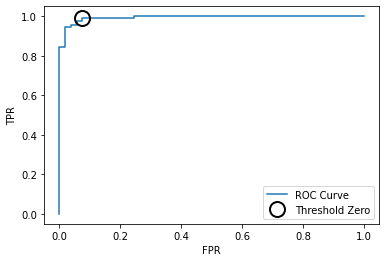

In [13]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel ('FPR')
plt.ylabel ('TPR')
nearest_to_0 = np.argmin(np.abs(thresholds))
plt.plot (fpr[nearest_to_0], tpr[nearest_to_0], 'o', markersize=15, label ='Threshold Zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [14]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, logreg.predict_proba(X_test)[:,1])
print("AUC Score for LogReg: {:.3f}".format(auc))

AUC Score for LogReg: 0.993
